# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [989]:
import pandas as pd
import requests
import tweepy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [990]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [991]:
'''
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)
'''
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [992]:
'''
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
'''

"\nconsumer_key = ''\nconsumer_secret = ''\naccess_token = ''\naccess_secret = ''\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n"

In [993]:
'''
with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive_enhanced.tweet_id:
        try:
            tweet_json = api.get_status(tweet_id, tweet_mode='extended')._json
            retweet_count = tweet_json['retweet_count']
            favorite_count = tweet_json['favorite_count']
            file.write(str(tweet_id) + ' ')
            file.write(str(retweet_count) + ' ')
            file.write(str(favorite_count) + '\n')
        except:
            continue
'''

"\nwith open('tweet_json.txt', 'w') as file:\n    for tweet_id in twitter_archive_enhanced.tweet_id:\n        try:\n            tweet_json = api.get_status(tweet_id, tweet_mode='extended')._json\n            retweet_count = tweet_json['retweet_count']\n            favorite_count = tweet_json['favorite_count']\n            file.write(str(tweet_id) + ' ')\n            file.write(str(retweet_count) + ' ')\n            file.write(str(favorite_count) + '\n')\n        except:\n            continue\n"

In [994]:
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    df_list = []
    for line in lines:
        tweet_id, retweet_count, favorite_count = line.split(' ')
        favorite_count = favorite_count[:-2]
        df_list.append({'tweet_id':tweet_id,
                        'retweet_count':retweet_count,
                        'favorite_count':favorite_count})
counts = pd.DataFrame(df_list, columns=['tweet_id','retweet_count','favorite_count'])
counts

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7168,3445
1,892177421306343426,5389,2987
2,891815181378084864,3552,2249
3,891689557279858688,7381,3766
4,891327558926688256,7928,3597
...,...,...,...
2323,666049248165822465,37,9
2324,666044226329800704,118,25
2325,666033412701032449,37,10
2326,666029285002620928,40,11


## Assessing Data

In [995]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [996]:
twitter_archive_enhanced[twitter_archive_enhanced.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [997]:
twitter_archive_enhanced[twitter_archive_enhanced.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [998]:
twitter_archive_enhanced[twitter_archive_enhanced.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [999]:
twitter_archive_enhanced[twitter_archive_enhanced.name != 'None'].name.value_counts()

a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: name, Length: 956, dtype: int64

### Quality issues
1. Replies and retweets are to drop

2. Need to find the breed that corresponds to each tweet

3. `tweet_id` in `counts` is data type object

4. There are cases where `rating_denominator` is not 10

5. `timestamp` datatype is not datetime

6. `retweet_count` and `favorite_count` are not integer

7. `stage` data type would be better as 'category'

8. 'None' and 'a' in `name` column

### Tidiness issues
1. `twitter_archive_enhanced_copy` and `breeds` can be merged

2. `twitter_archive_enhanced_copy` and `counts_copy` can be merged

3. Columns `doggo`, `floofer`, `pupper`, `puppo` can be in one column

## Cleaning Data

In [1000]:
# Make copies of original pieces of data
twitter_archive_enhanced_copy = twitter_archive_enhanced.copy()
image_predictions_copy = image_predictions.copy()
counts_copy = counts.copy()

### Issue #1: Replies and retweets are to drop.

#### Define: Drop rows in `twitter_archive_enhanced` which have values in `in_reply_to_status_id` or `retweeted_status_id` column.

#### Code

In [1001]:
twitter_archive_enhanced_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1002]:
c1 = twitter_archive_enhanced_copy.in_reply_to_status_id.isnull()
c2 = twitter_archive_enhanced_copy.retweeted_status_id.isnull()

columns_to_drop = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']

twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[c1 & c2].drop(columns_to_drop, axis=1)


#### Test

In [1003]:
twitter_archive_enhanced_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Issue #2: Need to find the breed that corresponds to each tweet.

#### Define: In `image_predictions`, the breed with the highest confidence is selected.

#### Code

In [1004]:
image_predictions_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [1005]:
breeds_list = []
for i, row in image_predictions_copy.iterrows():
    if row.p1_dog == True:
        breed = row.p1
    elif row.p2_dog == True:
        breed = row.p2
    elif row.p3_dog == True:
        breed = row.p3
    else:
        breed = 'Unidentified'
    breeds_list.append({'tweet_id':row.tweet_id, 'breed':breed})
breeds = pd.DataFrame(breeds_list, columns=['tweet_id','breed'])

#### Test

In [1006]:
breeds

,tweet_id,breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher
...,...,...
2070,891327558926688256,basset
2071,891689557279858688,Labrador_retriever
2072,891815181378084864,Chihuahua
2073,892177421306343426,Chihuahua


### Issue #3:  `twitter_archive_enhanced_copy` and `breeds` can be merged

#### Define: Merge `twitter_archive_enhanced_copy` and `breeds` on `tweet_id`

#### Code

In [1007]:
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy.merge(breeds, on='tweet_id', how='left')

#### Test

In [1008]:
twitter_archive_enhanced_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Unidentified
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,miniature_pinscher
2093,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,Rhodesian_ridgeback
2094,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,German_shepherd
2095,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,redbone


### Issue #4:  `tweet_id` in `counts` is data type object

#### Define: Convert `tweet_id` in `counts` data type to int.

#### Code

In [1009]:
counts_copy.tweet_id = counts_copy.tweet_id.astype(int)

#### Test

In [1010]:
counts_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2328 non-null   int64 
 1   retweet_count   2328 non-null   object
 2   favorite_count  2328 non-null   object
dtypes: int64(1), object(2)
memory usage: 54.7+ KB


### Issue #5:  `twitter_archive_enhanced_copy` and `counts_copy` can be merged

#### Define: Merge `twitter_archive_enhanced_copy` and `counts_copy` on `tweet_id`

#### Code

In [1011]:
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy.merge(counts_copy, on='tweet_id', how='left')

#### Test

In [1012]:
twitter_archive_enhanced_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Unidentified,7168,3445
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Chihuahua,5389,2987
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Chihuahua,3552,2249
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Labrador_retriever,7381,3766
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,basset,7928,3597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,miniature_pinscher,37,9
2093,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,Rhodesian_ridgeback,118,25
2094,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,German_shepherd,37,10
2095,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,redbone,40,11


### Issue #6:  Columns `doggo`, `floofer`, `pupper`, `puppo` can be in one column

#### Define: Integrate `doggo`, `floofer`, `pupper`, `puppo` columns into one column

#### Code

In [1013]:
stage_list = []
for i, row in twitter_archive_enhanced_copy.iterrows():
    if row.doggo != 'None':
        stage_list.append('Doggo')
    elif row.floofer != 'None':
        stage_list.append('Floofer')
    elif row.pupper != 'None':
        stage_list.append('Pupper')
    elif row.puppo != 'None':
        stage_list.append('Puppo')
    else:
        stage_list.append(np.nan)
        
twitter_archive_enhanced_copy['stage'] = stage_list
twitter_archive_enhanced_copy.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [1014]:
twitter_archive_enhanced_copy.stage.value_counts()

Pupper     221
Doggo       83
Puppo       23
Floofer      9
Name: stage, dtype: int64

### Issue #7:  There are cases where `rating_denominator` is not 10

#### Define: Drop rows whose rating_denominator is not 10

#### Code

In [1015]:
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[twitter_archive_enhanced_copy.rating_denominator == 10]

#### Test

In [1016]:
twitter_archive_enhanced_copy.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### Issue #8:  `timestamp` datatype is not datetime

#### Define: Convert `timestamp` datatype to datetime

#### Code

In [1017]:
twitter_archive_enhanced_copy.timestamp = twitter_archive_enhanced_copy.timestamp.apply(lambda x: x[:-6])

/Users/jeongho/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [1018]:
twitter_archive_enhanced_copy.timestamp = pd.to_datetime(twitter_archive_enhanced_copy.timestamp, format='%Y-%m-%d %H:%M:%S')

#### Test

In [1019]:
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2080 non-null   int64         
 1   timestamp           2080 non-null   datetime64[ns]
 2   source              2080 non-null   object        
 3   text                2080 non-null   object        
 4   expanded_urls       2077 non-null   object        
 5   rating_numerator    2080 non-null   int64         
 6   rating_denominator  2080 non-null   int64         
 7   name                2080 non-null   object        
 8   breed               1954 non-null   object        
 9   retweet_count       2072 non-null   object        
 10  favorite_count      2072 non-null   object        
 11  stage               336 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 211.2+ KB


### Issue #9:  `retweet_count` and `favorite_count` are not integer

#### Define: Drop nulls and convert `retweet_count` and `favorite_count` datatype to int

#### Code

In [1020]:
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[twitter_archive_enhanced_copy.retweet_count.notnull()]

In [1021]:
twitter_archive_enhanced_copy.retweet_count = twitter_archive_enhanced_copy.retweet_count.astype(int)
twitter_archive_enhanced_copy.favorite_count = twitter_archive_enhanced_copy.favorite_count.astype(int)

#### Test

In [1022]:
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2072 non-null   int64         
 1   timestamp           2072 non-null   datetime64[ns]
 2   source              2072 non-null   object        
 3   text                2072 non-null   object        
 4   expanded_urls       2069 non-null   object        
 5   rating_numerator    2072 non-null   int64         
 6   rating_denominator  2072 non-null   int64         
 7   name                2072 non-null   object        
 8   breed               1946 non-null   object        
 9   retweet_count       2072 non-null   int64         
 10  favorite_count      2072 non-null   int64         
 11  stage               335 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 210.4+ KB


### Issue #10:  `stage` data type would be better as 'category'

#### Define: Convert `stage` data type to 'category'

#### Code

In [1023]:
twitter_archive_enhanced_copy.stage = twitter_archive_enhanced_copy.stage.astype('category')

#### Test

In [1024]:
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2072 non-null   int64         
 1   timestamp           2072 non-null   datetime64[ns]
 2   source              2072 non-null   object        
 3   text                2072 non-null   object        
 4   expanded_urls       2069 non-null   object        
 5   rating_numerator    2072 non-null   int64         
 6   rating_denominator  2072 non-null   int64         
 7   name                2072 non-null   object        
 8   breed               1946 non-null   object        
 9   retweet_count       2072 non-null   int64         
 10  favorite_count      2072 non-null   int64         
 11  stage               335 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(5), object(5)
memory usage: 196.5+ KB


### Issue #11:  'None', 'an', 'the', 'one' and 'a' in `name` column

#### Define: Change 'None', 'an', 'the', 'one' and 'a' in `name` column to 'NaN'

#### Code

In [1025]:
twitter_archive_enhanced_copy.name = twitter_archive_enhanced_copy.name.replace(['None','an','the','one','a'],np.nan)

#### Test

In [1026]:
twitter_archive_enhanced_copy.name.value_counts()

Charlie       10
Cooper        10
Lucy          10
Oliver        10
Penny          9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 945, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [1027]:
twitter_archive_master = twitter_archive_enhanced_copy[['tweet_id','timestamp','text','retweet_count','favorite_count','rating_numerator','name','breed','stage','expanded_urls','source']]

In [1028]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [1029]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,retweet_count,favorite_count,rating_numerator,name,breed,stage,expanded_urls,source
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,7168,3445,13,Phineas,Unidentified,NaN,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,5389,2987,13,Tilly,Chihuahua,NaN,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,3552,2249,12,Archie,Chihuahua,NaN,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,7381,3766,13,Darla,Labrador_retriever,NaN,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,7928,3597,12,Franklin,basset,NaN,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r..."


### Visualization

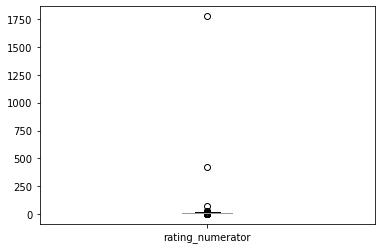

In [1030]:
plt.boxplot(df.rating_numerator);
plt.xticks([1],['rating_numerator']);

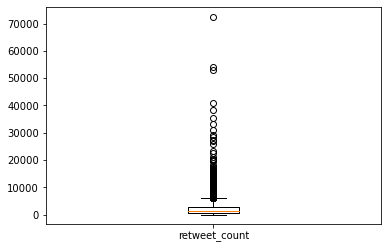

In [1031]:
plt.boxplot(df.retweet_count);
plt.xticks([1],['retweet_count']);

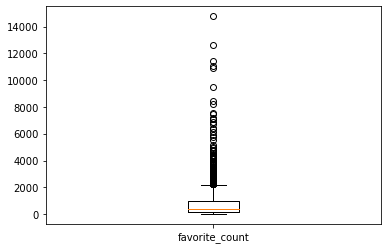

In [1032]:
plt.boxplot(df.favorite_count);
plt.xticks([1],['favorite_count']);

In [1033]:
# drop some outliers
df_drop = df[df.rating_numerator < 25]
df_drop = df_drop[df_drop.rating_numerator > 6]
df_drop = df_drop[df_drop.retweet_count < 50000]

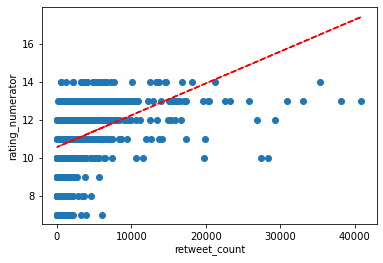

In [1034]:
x = df_drop.retweet_count
y = df_drop.rating_numerator

plt.scatter(x, y);
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--");

plt.xlabel('retweet_count');
plt.ylabel('rating_numerator');

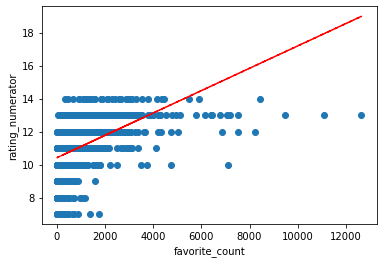

In [1035]:
x = df_drop.favorite_count
y = df_drop.rating_numerator

plt.scatter(x, y);
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--");

plt.xlabel('favorite_count');
plt.ylabel('rating_numerator');

In [1036]:
df_drop.stage.value_counts()

Pupper     217
Doggo       79
Puppo       23
Floofer      9
Name: stage, dtype: int64

In [1037]:
df_pupper = df_drop[df_drop.stage=='Pupper']
df_doggo = df_drop[df_drop.stage=='Doggo']
df_puppo = df_drop[df_drop.stage=='Puppo']
df_floofer = df_drop[df_drop.stage=='Floofer']

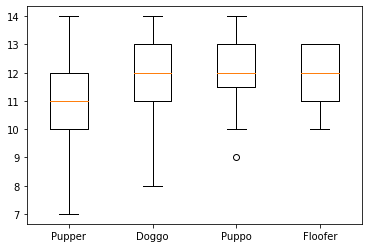

In [1038]:
plt.boxplot([df_pupper.rating_numerator, df_doggo.rating_numerator, df_puppo.rating_numerator, df_floofer.rating_numerator]);
plt.xticks([1,2,3,4],['Pupper','Doggo','Puppo','Floofer']);

In [1039]:
breed_count = df_drop.breed.value_counts().iloc[1:11]

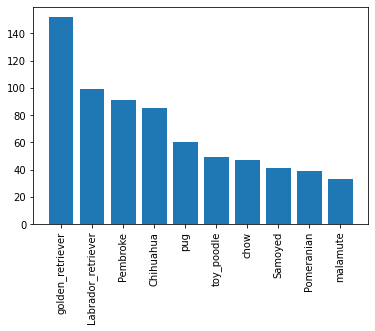

In [1040]:
plt.bar(breed_count.index, breed_count);
plt.xticks(rotation=90);

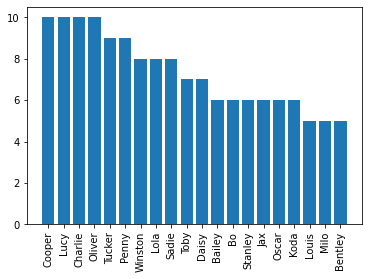

In [1041]:
name_count = df_drop.name.value_counts().head(20)
plt.bar(name_count.index, name_count);
plt.xticks(rotation=90);

In [1042]:
df_drop.timestamp = pd.to_datetime(df_drop.timestamp, format='%Y-%m-%d %H:%M:%S')

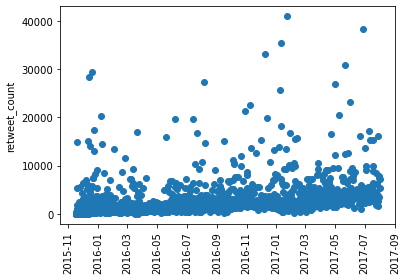

In [1043]:
plt.plot_date(df_drop.timestamp, df_drop.retweet_count)
plt.xticks(rotation=90);
plt.ylabel('retweet_count');

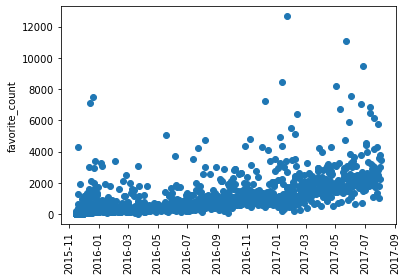

In [1044]:
plt.plot_date(df_drop.timestamp, df_drop.favorite_count)
plt.xticks(rotation=90);
plt.ylabel('favorite_count');

### Insights:
1. `rating_numerator` and `retweet_count` have a positive correlation

2. `rating_numerator` and `favorite_count` have a positive correlation

3. The median value of Pupper's rating is lower than that of other stages.

4. The favorite_count tends to increase with time.